In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
dataset = os.getenv("DATASET_PATH")

df = pd.read_csv(dataset)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

#### The attributes related with eating habits are: 
Frequent consumption of high caloric food (FAVC), 
Frequency of consumption of vegetables (FCVC), 
Number of main meals (NCP), 
Consumption of food between meals (CAEC), 
Consumption of water daily (CH20),  
Consumption of alcohol (CALC). 
### The attributes related with the physical condition are: 
Calories consumption monitoring (SCC), 
Physical activity frequency (FAF), 
Time using technology devices (TUE), 
Transportation used (MTRANS)

### Variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

Underweight Less than 18.5 |
Normal 18.5 to 24.9 |
Overweight 25.0 to 29.9 |
Obesity I 30.0 to 34.9 |
Obesity II 35.0 to 39.9 |
Obesity III Higher than 40

The variables from the dataset are a bit confusing so we will rename them

In [4]:
scaled_data = ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
len(scaled_data)

15

In [5]:
df.rename(columns = {'FAVC' : 'Caloric Food', 'FCVC' : 'Vegetable Consumption', 'NCP' : 'No of Main Meals', 'CAEC' : 'Food between meals', 'SCC' : 'Calory Consumption Monitoring', 'FAF' : 'Physical Activity', 'TUE' : 'Time using devices'}, inplace = True)

In [6]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Caloric Food,Vegetable Consumption,No of Main Meals,Food between meals,SMOKE,CH2O,Calory Consumption Monitoring,Physical Activity,Time using devices,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Statistics

In [7]:
df.shape

(2111, 17)

In [8]:
df.describe()

,Age,Height,Weight,Vegetable Consumption,No of Main Meals,CH2O,Physical Activity,Time using devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


From the above statistics we can see that everything seems to be normal and we can convert the Height variable from meters to centimeters as initially it is in meters 

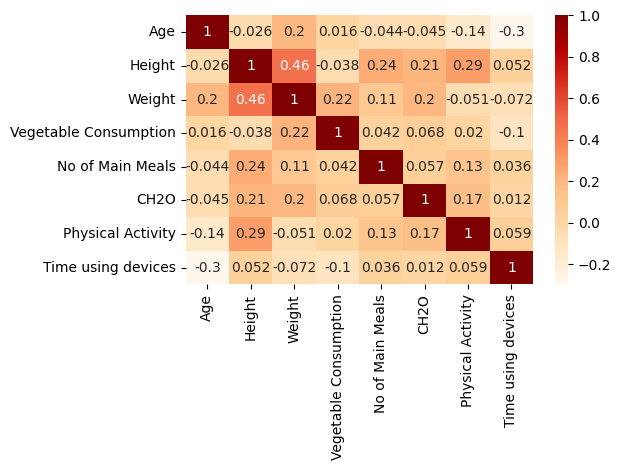

In [9]:
# Correlation of each numerical variable

num_cols = [col for col in df.columns if df[col].dtype != 'O']
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, cmap='OrRd', annot=True)
plt.tight_layout()
plt.show()

From the above Correlation plot we can observe that the independent variables are not much highly correlated with the Target Variable so we don't need to alter any of the columns from the DataFrame

# EDA

In [10]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'Caloric Food', 'Vegetable Consumption', 'No of Main Meals',
       'Food between meals', 'SMOKE', 'CH2O', 'Calory Consumption Monitoring',
       'Physical Activity', 'Time using devices', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

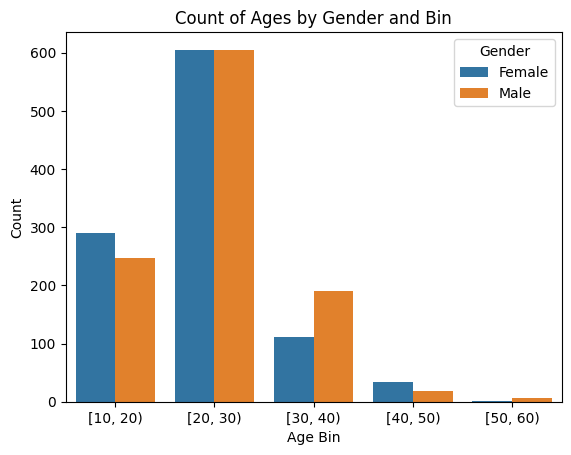

In [11]:
bin_edges = [10, 20, 30, 40, 50, 60]
df['Age_Bin'] = pd.cut(df['Age'], bins=bin_edges, right=False)
grouped_data = df.groupby(['Gender', 'Age_Bin']).size().reset_index(name='Count')
df.drop(columns=['Age_Bin'], inplace=True)

# Create a bar plot
sns.barplot(x='Age_Bin', y='Count', hue='Gender', data=grouped_data)
plt.title('Count of Ages by Gender and Bin')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.show()

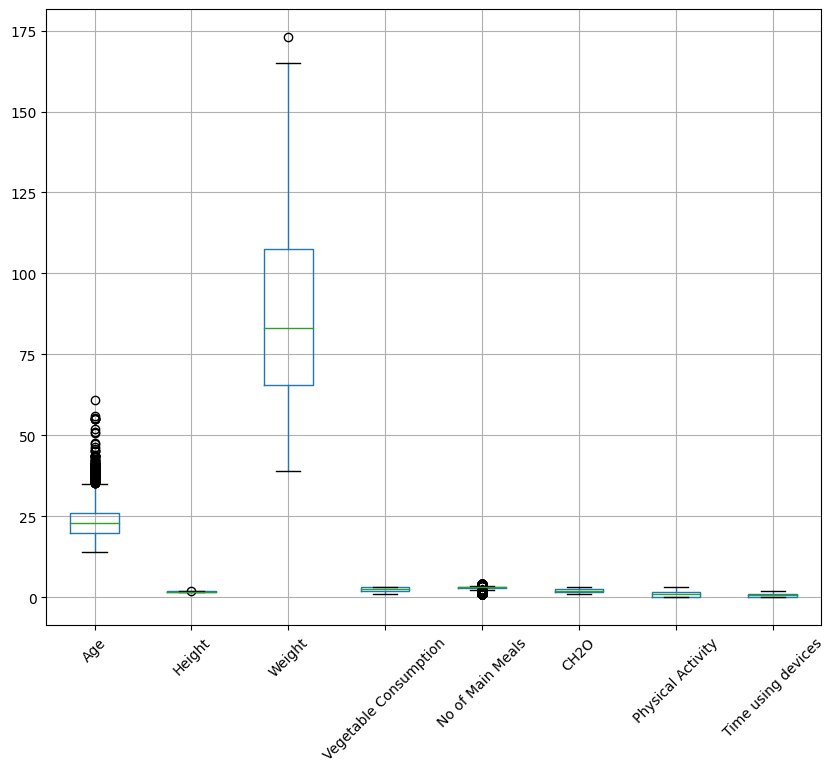

In [12]:
plt.figure(figsize = (10, 8))
df.boxplot(rot = 45)
plt.show()

From the above plot the Age Column appears to be having outliers so we need to inspect the Age column seperately

In [13]:
df[df['Age'] <= 20]['Age'].value_counts()

Age
18.000000    128
19.000000     59
20.000000     48
17.000000     30
16.000000      9
            ... 
17.282945      1
17.758315      1
16.928791      1
16.613108      1
18.469086      1
Name: count, Length: 315, dtype: int64

In [14]:
df['Age'] = np.ceil(df['Age']).astype(int)

In [15]:
df[df['Age'] >= 45]['Age'].value_counts()

Age
56    4
45    3
55    2
51    2
48    2
52    1
61    1
47    1
46    1
Name: count, dtype: int64

In [16]:
df.drop(df[df['Age'] >= 45].index, inplace=True)

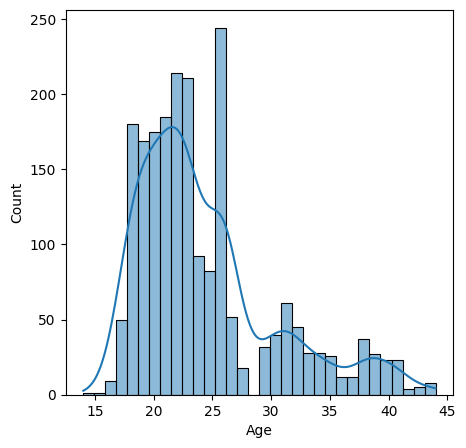

In [17]:
plt.figure(figsize = (5, 5))
sns.histplot(x = 'Age', data = df, kde = True)
plt.show()

In [18]:
# Similarly, we can visualize the distribution of other features too

def visualize_feature_distribution(data):
    """
    Visualize the distribution of numeric features using histograms with KDE.

    Parameters:
    - data: Pandas DataFrame containing numeric features.

    Returns:
    - None (displays the plots)
    """
    # Set the style for better visualization
    sns.set(style="whitegrid")

    # Determine the number of rows and columns for subplots
    num_features = len(data.columns)
    num_cols = 3  # Adjust the number of columns as per your preference
    num_rows = -(-num_features // num_cols)  # Ceiling division to get the required number of rows

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    # Create histograms with KDE for each numeric feature
    for i, column in enumerate(data.columns):
        sns.histplot(data[column], kde=True, color="skyblue", bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

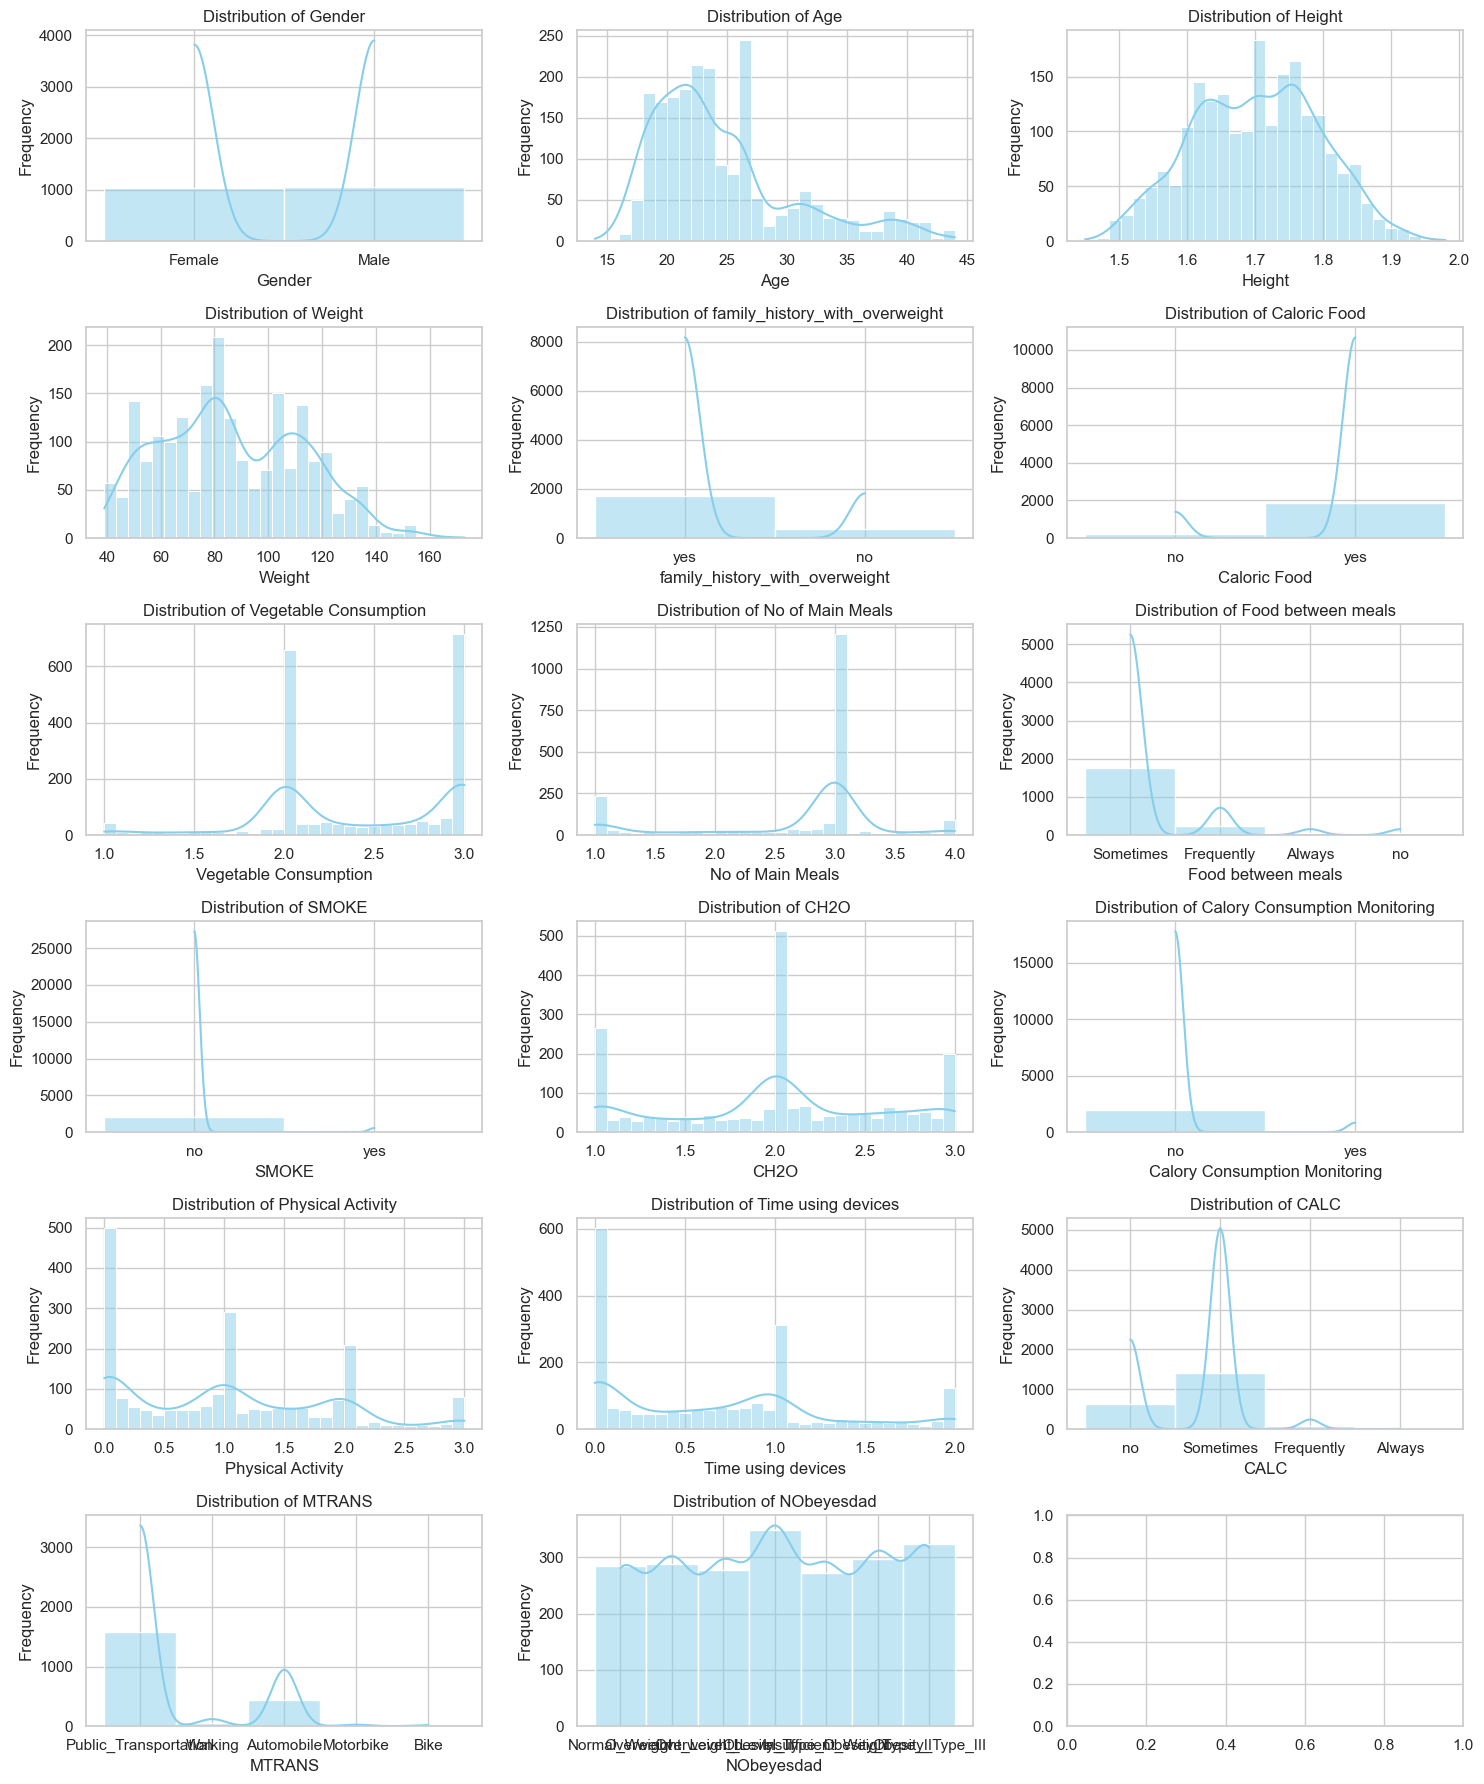

In [19]:
visualize_feature_distribution(df)

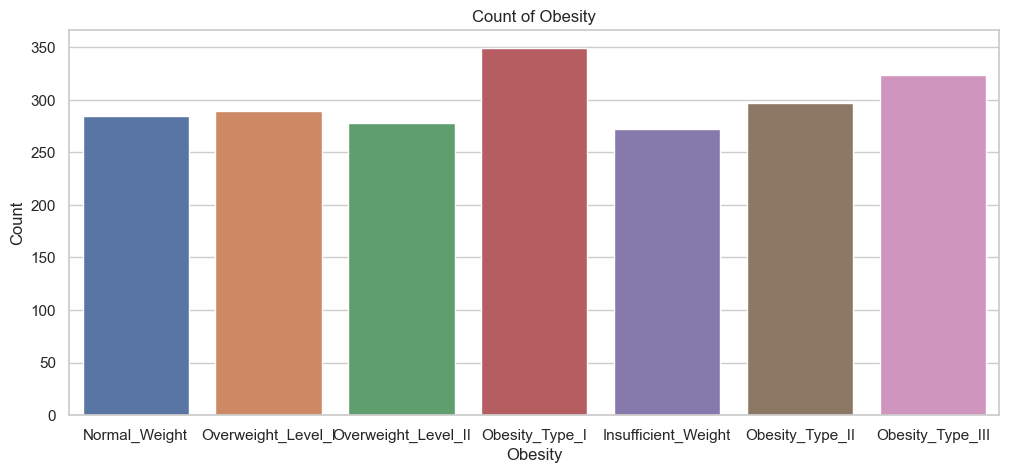

In [20]:
# Checking the Balance of the Target value

plt.figure(figsize = (12, 5))
sns.countplot(x = 'NObeyesdad', data = df)
plt.title('Count of Obesity')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.show()

From the above graph, the values of the target variable seems to be balanced so we can continue with further exploration

### Checking the values of each columns in the Data Frame to check whether there exits any Imbalanced feature

In [21]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         349
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     289
Normal_Weight          285
Overweight_Level_II    278
Insufficient_Weight    272
Name: count, dtype: int64

In [22]:
def check_imbalanced_data(df):
    for col in df.columns:
        print(f'Value count for column: {col}')
        for index, count in df[col].value_counts(normalize = True).items():
            print(f'{index}: {count}')
        print()

In [23]:
cols_except_age = df.columns.difference(['Age', 'CH20', 'Height', 'Weight', 'BMI'])
check_imbalanced_data(df[cols_except_age])

Value count for column: CALC
Sometimes: 0.669054441260745
no: 0.29847182425978985
Frequently: 0.03199617956064948
Always: 0.0004775549188156638

Value count for column: CH2O
2.0: 0.21060171919770773
1.0: 0.09933142311365807
3.0: 0.07640878701050621
2.825629: 0.0014326647564469914
1.636326: 0.0014326647564469914
1.439962: 0.0009551098376313276
2.426465: 0.0009551098376313276
2.371015: 0.0009551098376313276
1.229915: 0.0009551098376313276
1.984323: 0.0009551098376313276
2.843777: 0.0009551098376313276
1.179942: 0.0009551098376313276
2.174248: 0.0009551098376313276
1.656082: 0.0009551098376313276
2.450069: 0.0009551098376313276
2.13755: 0.0009551098376313276
2.530035: 0.0009551098376313276
1.490613: 0.0009551098376313276
1.876915: 0.0009551098376313276
2.444125: 0.0009551098376313276
1.031354: 0.0009551098376313276
2.147746: 0.0009551098376313276
2.115967: 0.0009551098376313276
2.184707: 0.0009551098376313276
2.654702: 0.0009551098376313276
2.406541: 0.0009551098376313276
1.01378: 0.00047

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2094 non-null   object 
 1   Age                             2094 non-null   int32  
 2   Height                          2094 non-null   float64
 3   Weight                          2094 non-null   float64
 4   family_history_with_overweight  2094 non-null   object 
 5   Caloric Food                    2094 non-null   object 
 6   Vegetable Consumption           2094 non-null   float64
 7   No of Main Meals                2094 non-null   float64
 8   Food between meals              2094 non-null   object 
 9   SMOKE                           2094 non-null   object 
 10  CH2O                            2094 non-null   float64
 11  Calory Consumption Monitoring   2094 non-null   object 
 12  Physical Activity               2094 no

### Train Test Split and Feature Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

gender_encoder = LabelEncoder()
family_history_with_overweight_encoder = LabelEncoder()
caloric_food_encoder = LabelEncoder()
food_between_meals_encoder = OrdinalEncoder()
smoke_encoder = LabelEncoder()
calory_monitoring_encoder = LabelEncoder()
alochol_encoder = OrdinalEncoder()
mtrans_encoder = OrdinalEncoder()

df['Gender'] = gender_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = family_history_with_overweight_encoder.fit_transform(df['family_history_with_overweight'])
df['Caloric Food'] = caloric_food_encoder.fit_transform(df['Caloric Food'])
df['Food between meals'] = food_between_meals_encoder.fit_transform(df['Food between meals'].ravel().reshape(-1, 1))
df['SMOKE'] = smoke_encoder.fit_transform(df['SMOKE'])
df['Calory Consumption Monitoring'] = calory_monitoring_encoder.fit_transform(df['Calory Consumption Monitoring'])
df['CALC'] = alochol_encoder.fit_transform(df['CALC'].ravel().reshape(-1, 1))
df['MTRANS'] = mtrans_encoder.fit_transform(df['MTRANS'].ravel().reshape(-1, 1))

X = df.drop(columns = 'NObeyesdad')
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [26]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Comparison and selection

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def evaluate_models(models, X_train, y_train, X_test, y_test):
    """
    Evaluate multiple models on a given dataset.

    Parameters:
    - models: List of tuples containing (model_name, model_instance)
    - X_train, y_train: Training data and labels
    - X_test, y_test: Testing data and labels

    Prints the accuracy for each model on the testing set.
    """
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name}: Accuracy = {accuracy:.4f}")

# Example usage
models = [
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("Support Vector Machine", SVC()),
    ("XGBoost", XGBClassifier())
]


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

evaluate_models(models, X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded)


Random Forest: Accuracy = 0.9624
Gradient Boosting: Accuracy = 0.9538
Logistic Regression: Accuracy = 0.8772
Support Vector Machine: Accuracy = 0.8815


c:\Users\devgo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost: Accuracy = 0.9711


In [30]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1)

lr.fit(X_train_scaled, y_train) # Training the model with all features
y_pred_simple = lr.predict(X_test_scaled) # Predicting the target value from all features

print('Accuracy: ', accuracy_score(y_test, y_pred_simple))
print('\nClassification Report: \n', classification_report(y_test, y_pred_simple))

Accuracy:  0.8771676300578035

Classification Report: 
                      precision    recall  f1-score   support

Insufficient_Weight       0.88      0.98      0.92        93
      Normal_Weight       0.89      0.68      0.77       106
     Obesity_Type_I       0.90      0.86      0.88       108
    Obesity_Type_II       0.93      0.99      0.96       112
   Obesity_Type_III       0.99      1.00      1.00       101
 Overweight_Level_I       0.73      0.82      0.77        83
Overweight_Level_II       0.80      0.80      0.80        89

           accuracy                           0.88       692
          macro avg       0.87      0.88      0.87       692
       weighted avg       0.88      0.88      0.88       692



c:\Users\devgo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Exporting

In [31]:
X_train_scaled.shape

(1402, 16)

In [32]:

import pickle

model_folder_path = r'D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Models'
model_objects_to_dump = [
    (lr, 'model'),
    (scaler, 'scaler')
]

for encoder, name in model_objects_to_dump:
    file_name = f'{name}.pkl'
    file_path = os.path.join(model_folder_path, file_name)
    with open(file_path, 'wb') as file:
        print(f'Dumping {name} to {file_path}')
        pickle.dump(encoder, file)
        
encoder_folder_path = r'D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Encoders'
encoder_objects_to_dump = [
    (gender_encoder, 'gender_encoder'),
    (family_history_with_overweight_encoder, 'family_history_with_overweight_encoder'),
    (caloric_food_encoder, 'caloric_food_encoder'),
    (food_between_meals_encoder, 'food_between_meals_encoder'),
    (smoke_encoder, 'smoke_encoder'),
    (calory_monitoring_encoder, 'calory_monitoring_encoder'),
    (alochol_encoder, 'alochol_encoder'),
    (mtrans_encoder, 'mtrans_encoder')
]

for encoder, name in encoder_objects_to_dump:
    file_name = f'{name}.pkl'
    file_path = os.path.join(encoder_folder_path, file_name)
    with open(file_path, 'wb') as file:
        print(f'Dumping {name} to {file_path}')
        pickle.dump(encoder, file)


Dumping model to D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Models\model.pkl
Dumping scaler to D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Models\scaler.pkl
Dumping gender_encoder to D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Encoders\gender_encoder.pkl
Dumping family_history_with_overweight_encoder to D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Encoders\family_history_with_overweight_encoder.pkl
Dumping caloric_food_encoder to D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Encoders\caloric_food_encoder.pkl
Dumping food_between_meals_encoder to D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Encoders\food_between_meals_encoder.pkl
Dumping smoke_encoder to D:\Computer_Programming\Python\ML-Projects\Obesity or CVD risk Prediction\Encoders\smoke_encoder.pkl
Dumping calory_monitoring_encoder to D:\Computer_Programming